# Lirpa Softsign

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def softsign(x):
    return x / (1.0 + np.abs(x))


def softsign_prime(x):
    return 1.0 / (1.0 + np.abs(x)) ** 2

In [4]:
x_ = np.linspace(-10, 10, 100)
y_ = softsign(x_)

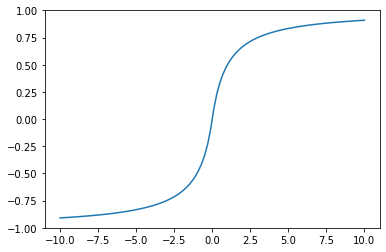

In [5]:
plt.plot(x_, y_)

In [6]:
def linear_hull_upper(lower, upper):

    s_u_prime = softsign_prime(upper)
    s_u = softsign(upper)
    s_l = softsign(lower)
    if s_u_prime >= (s_u - s_l) / (upper - lower):
        w_u = (s_u - s_l) / (upper - lower)
        b_u = -w_u * lower + s_l
    else:
        if lower >= 0:
            w_u = 0.0
            b_u = s_u
        else:
            t_ = np.linspace(0.0, 1.0, 100) * upper
            s_p_t_ = softsign_prime(t_)
            score = s_p_t_ - (softsign(t_) - s_l) / (t_ - lower)

            index_0 = np.argmin(np.abs(score))
            if score[index_0] <= 0:
                index_0 -= 1
            s_t = softsign(t_[index_0])
            t = t_[index_0]

            w_u = (s_t - s_l) / (t - lower)
            b_u = -w_u * lower + s_l

            V_0 = (w_u * upper + b_u - s_t) * (upper - t) / 2.0
            # V_1 = (s_t-s_l)*(-t-lower)/2.
            V_2 = (s_t - s_l) * (t - lower) / 2.0
            print(V_2, V_0)
            if V_2 <= V_0:
                w_u = 0.0
                b_u = s_u

    return [w_u, b_u]

In [7]:
def linear_hull_lower(lower, upper):

    s_l_prime = softsign_prime(lower)
    s_u = softsign(upper)
    s_l = softsign(lower)

    if s_l_prime - (s_u - s_l) / (upper - lower) >= 0.0:
        w_l = (s_u - s_l) / (upper - lower)
        b_l = -w_l * upper + s_u
    else:
        if upper <= 0:
            w_l = 0.0
            b_l = s_l

        # partir de 0 vers lower
        t_ = np.linspace(0.0, 1.0, 100) * lower
        s_p_t_ = softsign_prime(t_)
        score = s_p_t_ - (s_u - softsign(t_)) / (upper - t_)
        index_0 = np.argmin(np.abs(score))
        if score[index_0] <= 0:
            index_0 += 1
        s_t = softsign(t_[index_0])
        t = t_[index_0]

        w_l = (s_u - s_t) / (upper - t)
        b_l = -w_l * upper + s_u

        V_2 = (upper - t) * (s_u - s_t) / 2.0
        # V_1 = (s_t-s_l)*(-t-lower)/2.
        V_0 = (s_t - w_l * lower - b_l) * (t - lower) / 2.0

        if V_2 <= V_0:
            w_l = 0.0
            b_l = s_l
    return [w_l, b_l]

In [12]:
def func(x_min, x_max):
    n_step = 100
    if x_max < x_min:
        x_max_ = x_max + 0
        x_max = x_min
        x_min = x_max_
    x = np.linspace(x_min, x_max, n_step)
    y = np.linspace(-10, 10, 1000)

    w_u, b_u = linear_hull_upper(x_min, x_max)
    w_l, b_l = linear_hull_lower(x_min, x_max)
    s_x = softsign(x)
    s_y = softsign(y)
    z_x = w_u * x + b_u
    q_x = w_l * x + b_l

    plt.title("{}, {}".format(np.min(z_x - s_x), np.min(s_x - q_x)))

    # import pdb; pdb.set_trace()

    # plt.xlim(0., x_max)

    plt.plot(x, s_x, c="blue")
    plt.plot(x, z_x, c="orange")
    # import pdb; pdb.set_trace()
    plt.plot(x, q_x, c="green")
    plt.plot(y, s_y, "--", c="k")

4.15448343079922 1.682394116604643


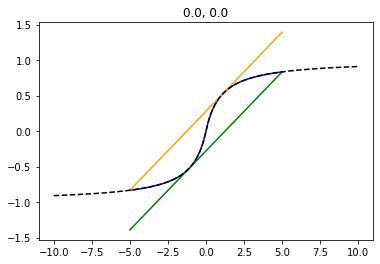

In [13]:
func(-5.0, 5.0)

In [23]:
softsign(-10)

-0.9090909090909091

In [24]:
softsign(1.0)

0.5

In [21]:
x_min = -10
x_max = 10
n_step = 100
x = np.linspace(x_min, x_max, n_step)
z = softsign_prime(-4) * x - softsign(x)

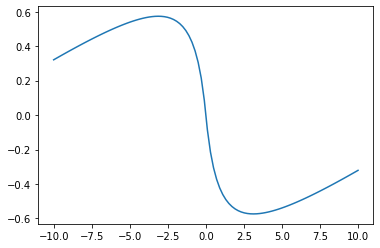

In [22]:
plt.plot(x, z)